<a href="https://colab.research.google.com/github/Quan21046403/Ai/blob/main/50_startups_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [3]:
url='50_Startups.csv'
data=pd.read_csv(url)
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


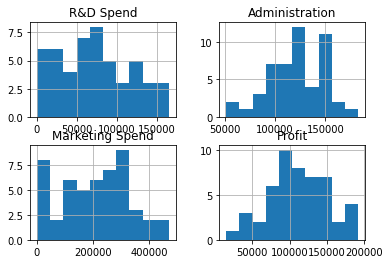

In [4]:
data.hist()
plt.show()

In [5]:
correlation = data.corr()
print(correlation)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


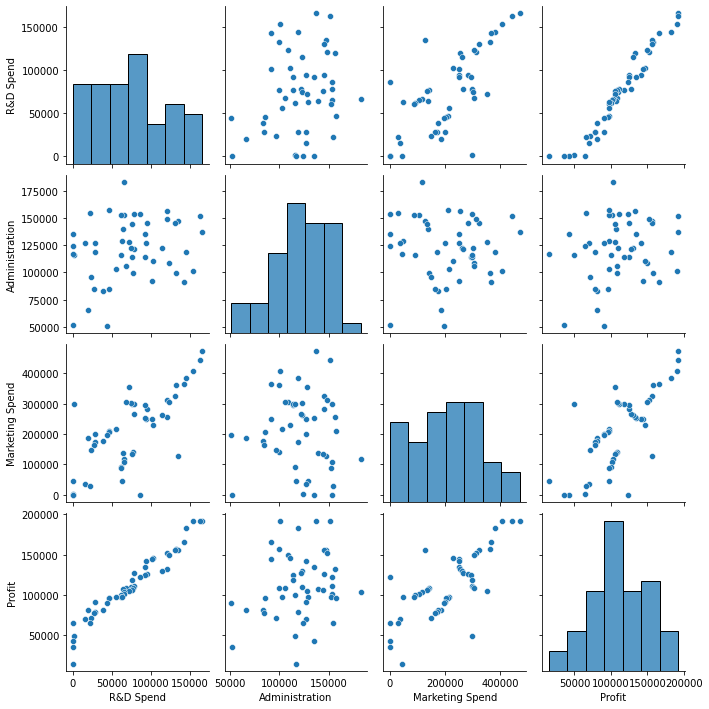

In [6]:
sns.pairplot(data)

<Axes: >

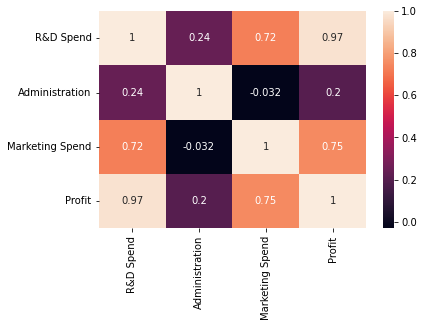

In [7]:
sns.heatmap(correlation,annot=True)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Profit', ylabel='R&D Spend'>

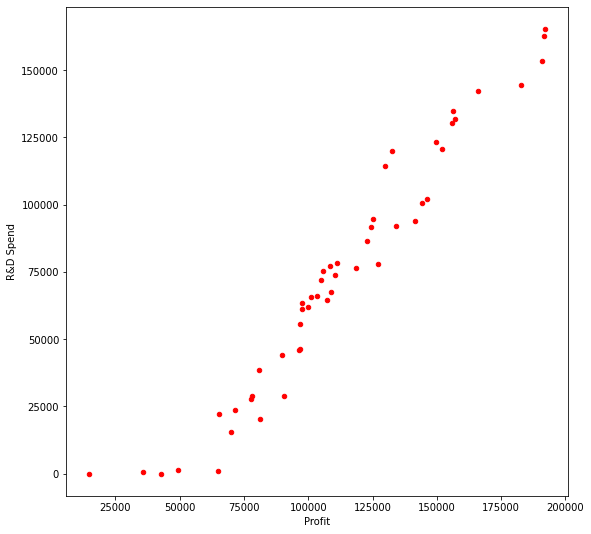

In [8]:
data.plot(kind='scatter',x='Profit',y='R&D Spend',figsize=(9,9),color='red' )

In [9]:
#hồi quy bậc 1
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['Profit']),y=data['R&D Spend'])
print('Giá trị Intercept là: ',model.intercept_)
print('Giá trị Coeffient là: ',model.coef_)
#y=1.10797715*x + (-50385.82883510302)

Giá trị Intercept là:  -50385.82883510302
Giá trị Coeffient là:  [1.10797715]


In [10]:
X=pd.DataFrame(data['Profit'])
y=data['R&D Spend']
model.score(X,y) #Đánh giá độ chính xác: 75%

0.9465353160804393

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


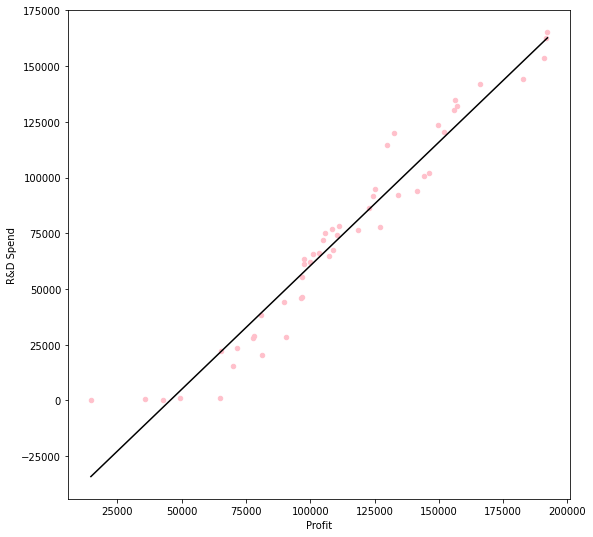

In [11]:
y_pred = model.predict(X)                 #y predict, Giá trị dự báo, hay y mũ
data.plot(kind='scatter',x='Profit',y='R&D Spend',figsize=(9,9),color='pink' )
plt.plot(data['Profit'],y_pred, color='black')    #Hồi quy bậc 1

In [12]:
model = linear_model.LinearRegression()
# Profit
# R&D Spend
X=pd.DataFrame([data['Profit'],data['Profit']**2]).T   #T: Transpose, chuyển vị
model.fit(X,y=data['R&D Spend'])
print("Hệ số Intercept: ",model.intercept_)
print("Hệ số coeffient là: ",model.coef_)
print("Độ chính xác của mô hình: ", model.score(X,y))  
#y=(0.00000119427444 x^2) + (0.839353178.x) + (-37182.30912423563)
#Accuracy = 0.949729234009626

Hệ số Intercept:  -37182.30912423563
Hệ số coeffient là:  [8.39353178e-01 1.19427444e-06]
Độ chính xác của mô hình:  0.9497292340096265


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


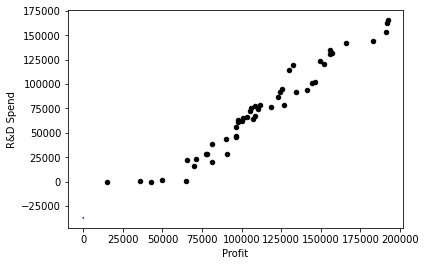

In [21]:
import numpy as np
range = np.arange(1.5,5.5,1)
X_range = pd.DataFrame([range, range**2]).T
y_pred = model.predict(X_range)
data.plot(kind='scatter', x='Profit', y='R&D Spend',  color ='black')
plt.plot(range, y_pred, color='blue')